# **Emergency - 911 Calls Analysis**

__Import libraries__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

__Load Dataset and check general attributes__

In [2]:
df = pd.read_csv('911.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [3]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


__Identyfying top 5 zipcodes for 911 calls__

In [4]:
df['zip'].sort_values().head(5)

8367     17752.0
41689    18036.0
26763    18036.0
95602    18041.0
88215    18041.0
Name: zip, dtype: float64

__Identyfying top 5 townships (twp) for 911 calls__

In [5]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

__In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Using .apply() with a lambda expression to create a new column called "Reason" that contains this string value.__

In [6]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

__Displaying most common Reasons for a 911 call__

In [7]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

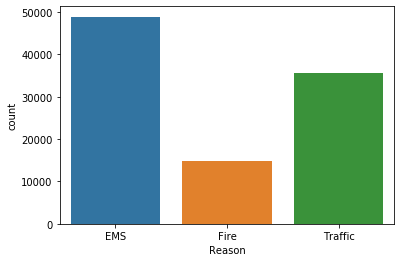

In [10]:
sns.countplot(x='Reason',data=df)

__data type of the objects in the timeStamp column__

In [8]:
type(df['timeStamp'].iloc[0])

str

__Using pd.to_datetime to convert the column from strings to DateTime objects.__

In [9]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

 __creating 3 new columns called Hour, Month, and Day of Week based off of the timeStamp column__

In [10]:
df['Hour'] = df['timeStamp'].apply(lambda timeStamp: timeStamp.hour)
df['Month'] = df['timeStamp'].apply(lambda timeStamp: timeStamp.month)
df['Day of Week'] = df['timeStamp'].apply(lambda timeStamp: timeStamp.dayofweek)

In [11]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3


__Notice how the Day of Week is an integer 0-6. hence using map() to map the actual string names to the day of the week__

In [12]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

In [13]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu


# __Data Visualization__

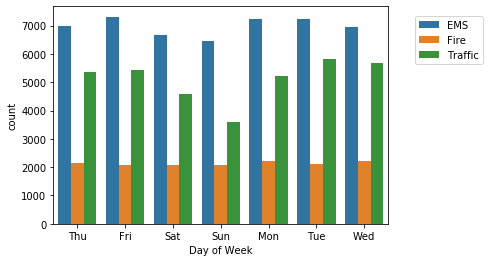

In [14]:
sns.countplot(x='Day of Week',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1)

__Clearly the most common reason for 911 calls was EMS (emergency medical services). Second most famous reason was Traffic and the least common reason was Fire.__

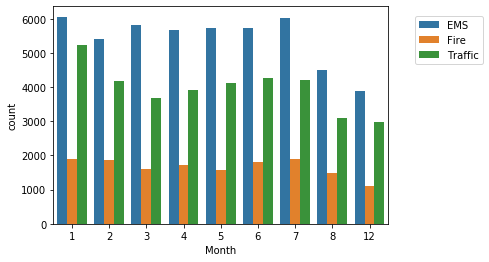

In [15]:
sns.countplot(x='Month',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1)

__As you can see above, most number of emergency calls were made in Jan and July while the least number of calls were made in December.__

__Adding date column__

In [16]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())
df.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


__Displaying month-wise calls made for all the 3 reasons below:__

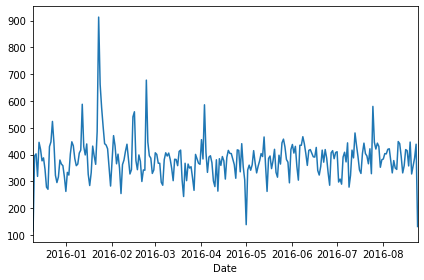

In [17]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

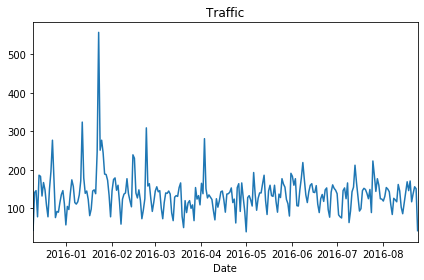

In [18]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

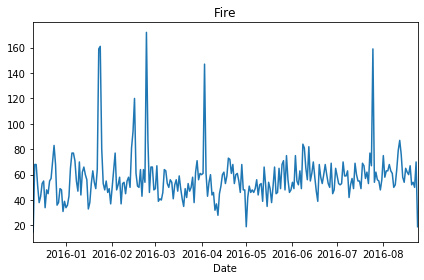

In [19]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

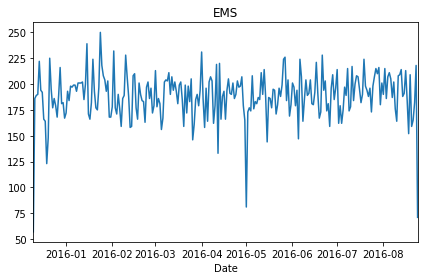

In [20]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

__Creating heatmap: For heat map the dataframe should be in matrix for. So restructuring the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.__ 

In [21]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


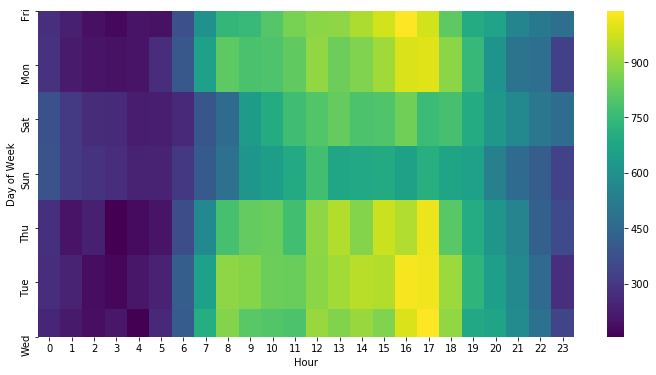

In [22]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

__Most emergency calls were made during daytime between 10 to 18 hours. On Sunday the number of calls were very less compared to other week days.__

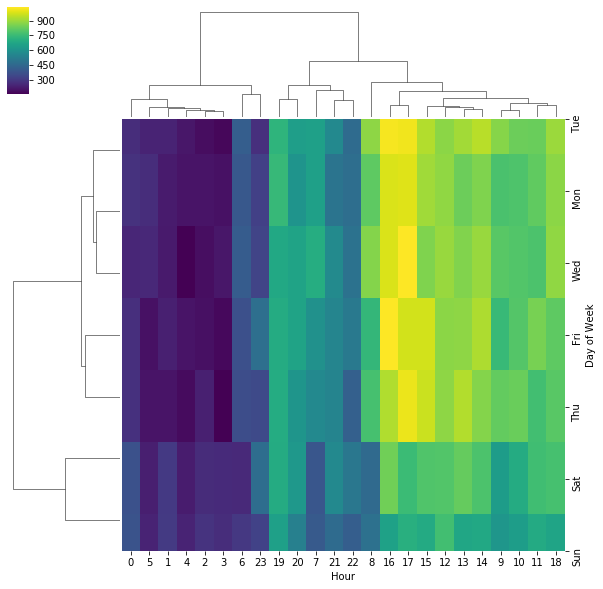

In [23]:
sns.clustermap(dayHour,cmap='viridis')

__Repeating the same process to visialize data in months__

In [24]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


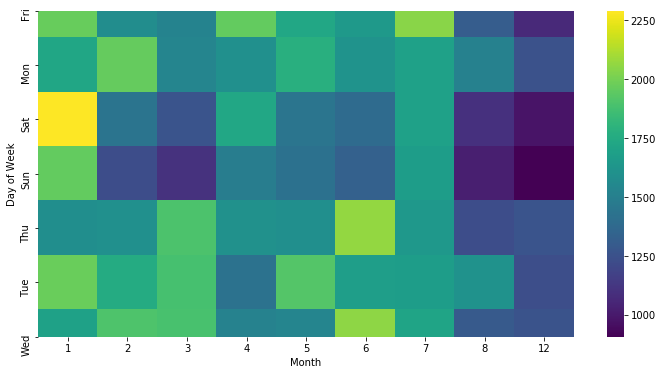

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

__As seen earlier, december recorded least number of calls.__

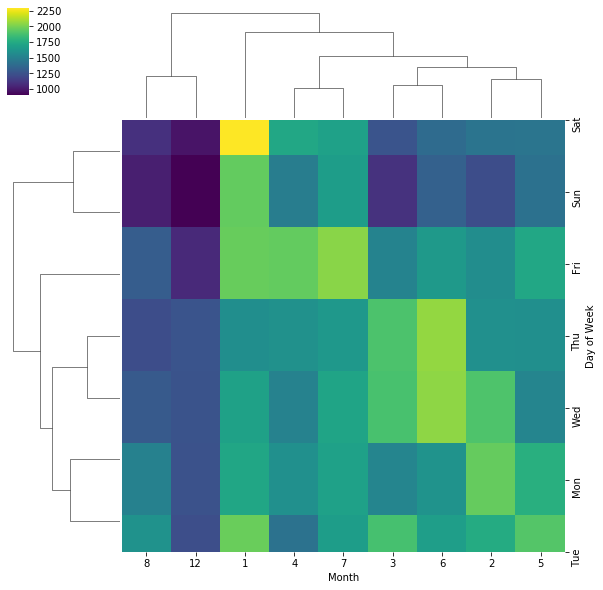

In [26]:
sns.clustermap(dayMonth,cmap='viridis')

# Conclusion:
__1. The most common reason for 911 calls was  EMS (emergency medical services)__

__2. As we shifted towards the end of the year, number of calls gradually decreased.__

__3. Most frequent time of 911 calls was during daytime between 10 to 18 hours.__